# Probability
- Measure to the likelihood of an event occurring (khả năng xảy ra của một sự kiện)

## Classical Probability

$$ \text{P(A)} = \frac{\text{number of favorable  outcomes}}
                {\text{total number of possible outcomes}} 
               = \frac{n_A}{n_\Omega}$$
### Example
- What is the probability of rolling a number is even on a regular dice?
-> There are 6 faces on a fair dice, numbered 1 to 6
$$ => n_\Omega = 6 $$
-> A : "even number" => A = {2, 4, 6}
=> n(A) = 3
=> P(A) = 3/6 = 0.5

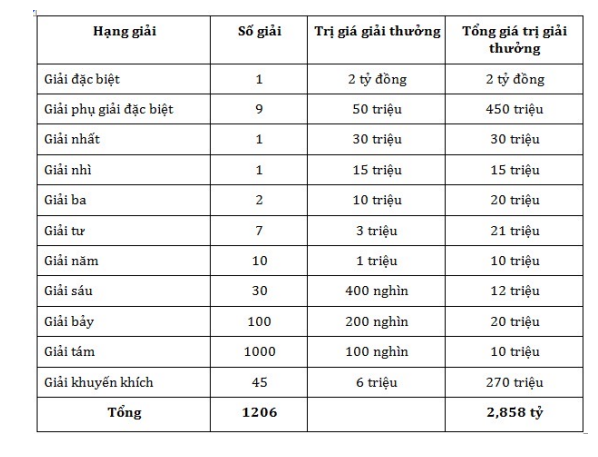

- What if we tried to buy the lottery 100000 times

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Thiết lập tham số mô phỏng
n_simulations = 100000 # Số lần mô phỏng
numbers_range = 10 # Mỗi số chạy từ 0-9
ticket_length = 6 # Vé số có 6 chữ số

# Mảng để lưu số lần trúng cho mỗi trường hợp (trúng 1, 2, .. 6)
matches_count = np.zeros(ticket_length + 1)

# Mô phỏng Monte carlo
for _ in range(n_simulations):
    # Giả sử người chơi mua vé số (6 số ngẫu nhiên từ 0-9, có thể trùng lặp)
    player_numbers = np.random.randint(0, numbers_range, ticket_length)

    # Giả lập kết quả sổ xố (6 số ngẫu nhiên từ 0-9, có thể trùng lặp)
    winning_numbers = np.random.randint(0, numbers_range, ticket_length)

    # Đếm số con số trùng khớp đúng vị trí
    matches = np.sum(player_numbers == winning_numbers)
    matches_count[matches] += 1

# Tính xác suất cho mỗi trường hợp
probabilites = matches_count / n_simulations

# Hiển thị kết quả
print(f"Kết quả mô phỏng sau {n_simulations:,} lần:")
for i in range(ticket_length + 1):
    print(f"Xác suất trúng {i} số đúng vị trí: {probabilites[i]:.6f} ({matches_count[i]:.0f} lần)")
    

Kết quả mô phỏng sau 100,000 lần:
Xác suất trúng 0 số đúng vị trí: 0.530750 (53075 lần)
Xác suất trúng 1 số đúng vị trí: 0.353260 (35326 lần)
Xác suất trúng 2 số đúng vị trí: 0.099980 (9998 lần)
Xác suất trúng 3 số đúng vị trí: 0.014910 (1491 lần)
Xác suất trúng 4 số đúng vị trí: 0.001040 (104 lần)
Xác suất trúng 5 số đúng vị trí: 0.000060 (6 lần)
Xác suất trúng 6 số đúng vị trí: 0.000000 (0 lần)


## Example 
### The `birthday problem` asks for the probability that, in a set of `n` randomly chosen people, at least two will share the same birthday.
The `birthday paradox` is the counterintuitive fact that only 23 people are needed for that probability to exceed 50%

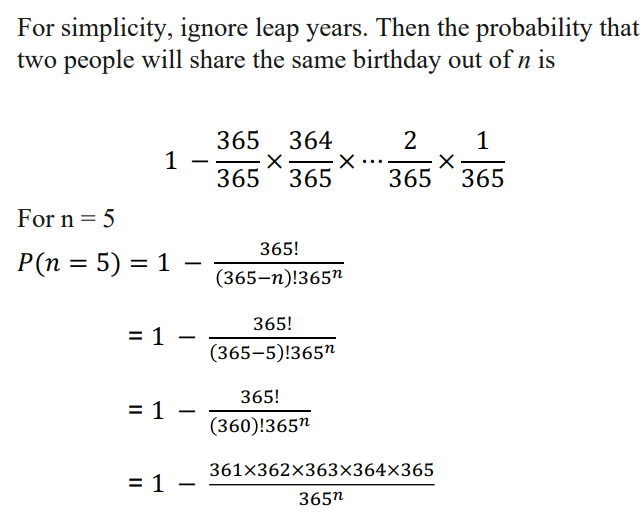

- Probability of at least two sharing a birthday:  

$$ P(at least two share a birthday) = 1 - P(all birthdays are distinct) $$

- Calculate the Probability That All Birthdays Are Distinct, 
- We compute P(all birthdays are distinct) for n people. 
$$ P(first person) = 365/365 = 1 $$

$$ P(second person | first) = 364/365 $$

$$ P(n-th person | first n-1) = (365 - (n-1))/365 $$

$$ P(all birthdays are distinct) = (365 × 364 × 363 × … × (365 - (n-1))) / 365^n $$

- -> 365! = 365 × 364 × … × (365 - (n-1)) × (365 - n) × … × 1 and (365 - n)! = (365 - n) × (365 - (n+1)) × … × 1  
- Dividing 365! by (365 - n)! leaves the desired product.

$$ P(all birthdays are distinct) = (365! / (365 - n)!) / 365^n = 365! / ((365 - n)! · 365^n) $$
- So general formula for the probability that at least two people out of n share a birthday.

$$ P(at least two share a birthday) = 1 - 365! / ((365 - n)! · 365^n) $$









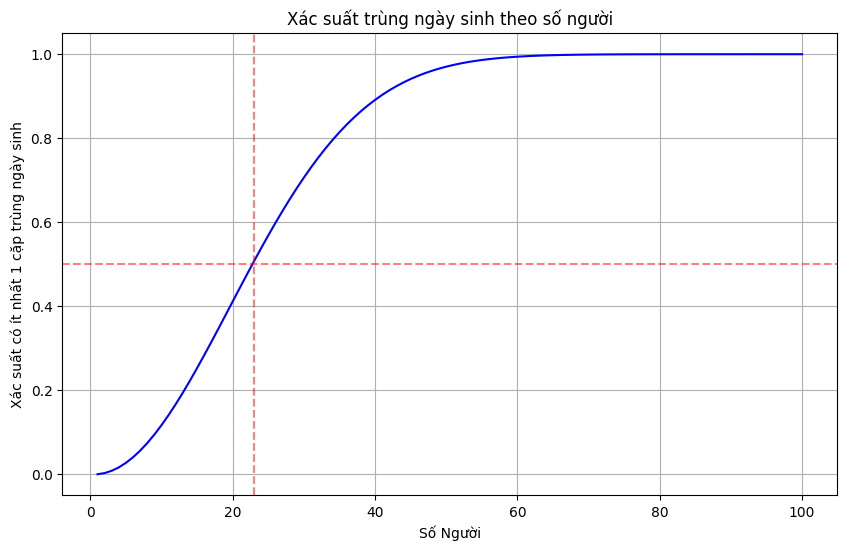

In [10]:
import matplotlib.pyplot as plt

def cal_birthday_prob(n):
    numerator = 1.0
    for i in range(365, 365 - n, -1):
        numerator *= i

    denominator = 365**n

    return 1 - (numerator / denominator)

# Tính xác suất cho số người từ 1 đến 100
people_range = range(1, 101)
probas = [cal_birthday_prob(p) for p in people_range]

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(people_range, probas, 'b-')
plt.xlabel('Số Người')
plt.ylabel('Xác suất có ít nhất 1 cặp trùng ngày sinh')
plt.title('Xác suất trùng ngày sinh theo số người')
plt.grid(True)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5) # đường 50%
plt.axvline(x=23, color='r', linestyle='--', alpha=0.5) # đường 23 người

# Rules of Probability

## Rule 1: Complement Rule
For any event \( A \), the probability of \( A \) lies between 0 and 1, and the probability of the complement of \( A \) is given by:

$$
0 \leq P(A) \leq 1 \quad \text{and} \quad P(A^c) = 1 - P(A)
$$

**Example**: Suppose you’re flipping a fair coin, and \( A \) is the event "getting heads." The probability \( P(A) = 1/2 \) (since there are 2 possible outcomes: heads or tails, each with probability 1/2). The complement \( A^c \) is "getting tails," so \( P(A^c) = 1 - P(A) = 1 - 1/2 = 1/2 \), which matches the probability of tails. This confirms that the total probability of all outcomes (heads or tails) is 1.

---

## Rule 2: Sample Space Rule
The probability of the sample space \( S \) is:

$$
P(S) = 1
$$

**Example**: When rolling a six-sided die, the sample space \( S \) is the set of all possible outcomes: \( \{1, 2, 3, 4, 5, 6\} \), and each outcome has a probability of \( 1/6 \). The total probability of the sample space is \( P(S) = 1/6 + 1/6 + 1/6 + 1/6 + 1/6 + 1/6 = 6/6 = 1 \), which satisfies the rule that the probability of all possible outcomes combined is 1.

---

## Rule 3: Addition Rule
The probability of the union of two events \( A \) and \( B \) is:

$$
P(A \cup B) = P(A) + P(B) - P(A \cap B)
$$

If \( A \) and \( B \) are mutually exclusive, then:

$$
P(A \cap B) = 0
$$

**Example**: Consider rolling a six-sided die again. Let \( A \) be "rolling an even number" (\( \{2, 4, 6\} \), so \( P(A) = 3/6 = 1/2 \)) and \( B \) be "rolling a number greater than 3" (\( \{4, 5, 6\} \), so \( P(B) = 3/6 = 1/2 \)). The intersection 

$$ A \cap B $$ 

is "rolling an even number greater than 3" (\( \{4, 6\} \), so 

$$ P(A \cap B) = 2/6 = 1/3 $$

The union 

$$ A \cup B $$

is "rolling an even number or a number greater than 3" (\( \{2, 4, 5, 6\} \), so 

$$ P(A \cup B) = 4/6 = 2/3 $$

Using the formula: 

$$ P(A \cup B) = 1/2 + 1/2 - 1/3 = 1 - 1/3 = 2/3 $$

which matches.

**Mutually Exclusive Example**: Let \( A \) be "rolling a 1" (\( P(A) = 1/6 \)) and \( B \) be "rolling a 2" (\( P(B) = 1/6 \)). Since a die can’t show both 1 and 2 at the same time, \( A \) and \( B \) are mutually exclusive, so 

$$ P(A \cap B) = 0 $$

The union 

$$ A \cup B $$ 

is "rolling a 1 or a 2" (\( \{1, 2\} \), so 

$$ P(A \cup B) = 2/6 = 1/3 $$

and the formula gives 

$$ P(A \cup B) = 1/6 + 1/6 - 0 = 2/6 = 1/3 $$

, which holds.

---

## Rule 4: Conditional Probability
The conditional probability of \( A \) given \( B \) is:

$$
P(A|B) = \frac{P(A \cap B)}{P(B)}
$$

**Example**: Suppose you’re drawing a card from a standard deck (52 cards, 26 red, 26 black). Let \( A \) be "drawing a red card" (\( P(A) = 26/52 = 1/2 \)) and \( B \) be "drawing a heart" (13 hearts, so \( P(B) = 13/52 = 1/4 \)). The intersection 

$$ A \cap B $$ 

is "drawing a red heart" (all hearts are red, so 

$$ P(A \cap B) = 13/52 = 1/4 $$

The conditional probability \( P(A|B) \) is the probability of drawing a red card given it’s a heart: 

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{1/4}{1/4} = 1 $$

, which makes sense because all hearts are red.

---

## Rule 5: Multiplication Rule
The probability of the intersection of two events \( A \) and \( B \) can be computed as:

$$
P(A \cap B) = P(A|B)P(B) = P(B|A)P(A)
$$

**Example**: Using the card example again, let \( A \) be "drawing a red card" (\( P(A) = 1/2 \)) and \( B \) be "drawing a heart" (\( P(B) = 1/4 \)). The conditional probability \( P(A|B) = 1 \) (as calculated above, since all hearts are red). Using the multiplication rule: 

$$ P(A \cap B) = P(A|B)P(B) = 1 \cdot 1/4 = 1/4 $$

, which matches 

$$ P(A \cap B) = 13/52 = 1/4 $$ 

Alternatively, \( P(B|A) \) is the probability of drawing a heart given it’s red: \( P(B|A) = 13/26 = 1/2 \), so 

$$ P(A \cap B) = P(B|A)P(A) = (1/2) \cdot (1/2) = 1/4 $$

, confirming the rule.

---

## Rule 6: Independent Events
If \( A \) and \( B \) are independent, then:

$$
P(A \cap B) = P(A)P(B)
$$

**Example**: Suppose you flip a fair coin and roll a six-sided die, and these are independent events. Let \( A \) be "getting heads" (\( P(A) = 1/2 \)) and \( B \) be "rolling a 3" (\( P(B) = 1/6 \)). Since the coin flip doesn’t affect the die roll (and vice versa), \( A \) and \( B \) are independent. The probability of both events occurring 

$$ A \cap B $$

, i.e., "getting heads and rolling a 3") is 

$$ P(A \cap B) = P(A)P(B) = (1/2) \cdot (1/6) = 1/12 $$

If you performed this experiment many times, the proportion of times you get heads and a 3 would approach 1/12, supporting the rule.

## Rule 7: Bayes' Rule
If \( A_1, A_2, \dots, A_n \) form a complete system of events and \( H \) is any event with \( P(A_i) \neq 0 \), then:

$$
P(A_i|H) = \frac{P(A_i)P(H|A_i)}{P(H)} = \frac{P(A_i)P(H|A_i)}{\sum_{j=1}^n P(A_j)P(H|A_j)}, \quad i = 1, 2, \dots, n
$$

**Example**: A factory produces light bulbs using three production lines: Line 1 (\( A_1 \)), Line 2 (\( A_2 \)), and Line 3 (\( A_3 \)). 
- Line 1 produces 50% of the bulbs (\( P(A_1) = 0.5 \)).
- Line 2 produces 30% (\( P(A_2) = 0.3 \)).
- Line 3 produces 20% (\( P(A_3) = 0.2 \)).
- Defective rates:
  - Line 1: 2% defective (\( P(H|A_1) = 0.02 \)).
  - Line 2: 5% defective (\( P(H|A_2) = 0.05 \)).
  - Line 3: 1% defective (\( P(H|A_3) = 0.01 \)).
- \( H \): The event "the bulb is defective."

**Question**: If a bulb is defective (\( H \)), what is the probability it came from Line 1 (\( P(A_1|H) \))?

**Step 1: Calculate \( P(H) \)** (total probability of a defective bulb):

$$
P(H) = P(A_1)P(H|A_1) + P(A_2)P(H|A_2) + P(A_3)P(H|A_3)
$$

$$
P(H) = (0.5 \cdot 0.02) + (0.3 \cdot 0.05) + (0.2 \cdot 0.01) = 0.01 + 0.015 + 0.002 = 0.027
$$

**Step 2: Calculate \( P(A_1|H) \)** (probability the defective bulb came from Line 1):

$$
P(A_1|H) = \frac{P(A_1)P(H|A_1)}{P(H)} = \frac{0.5 \cdot 0.02}{0.027} = \frac{0.01}{0.027} \approx 0.3704
$$

**Result**: The probability that a defective bulb came from Line 1 is approximately 37.04%.

